NBA STATS ANALYSIS TO FIND BEST THREE POINT SHOOTER.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2023_nba_player_stats.csv')
df.head()

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,...,649.0,342.0,213.0,78.0,51.0,160.0,3691.0,31.0,1.0,470.0
1,Joel Embiid,C,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,...,670.0,274.0,226.0,66.0,112.0,205.0,3706.0,39.0,1.0,424.0
2,Luka Doncic,PG,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,...,569.0,529.0,236.0,90.0,33.0,166.0,3747.0,36.0,10.0,128.0
3,Shai Gilgeous-Alexander,PG,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,...,329.0,371.0,192.0,112.0,65.0,192.0,3425.0,3.0,0.0,149.0
4,Giannis Antetokounmpo,PF,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,...,742.0,359.0,246.0,52.0,51.0,197.0,3451.0,46.0,6.0,341.0


In [4]:
df.shape

(539, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    float64
 4   GP      539 non-null    float64
 5   W       539 non-null    float64
 6   L       539 non-null    float64
 7   Min     539 non-null    float64
 8   PTS     539 non-null    float64
 9   FGM     539 non-null    float64
 10  FGA     539 non-null    float64
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    float64
 13  3PA     539 non-null    float64
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    float64
 16  FTA     539 non-null    float64
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    float64
 19  DREB    539 non-null    float64
 20  REB     539 non-null    float64
 21  AST     539 non-null    float64
 22  TO

In [6]:
df.columns

Index(['Player', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

In [7]:
df.head()

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,...,649.0,342.0,213.0,78.0,51.0,160.0,3691.0,31.0,1.0,470.0
1,Joel Embiid,C,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,...,670.0,274.0,226.0,66.0,112.0,205.0,3706.0,39.0,1.0,424.0
2,Luka Doncic,PG,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,...,569.0,529.0,236.0,90.0,33.0,166.0,3747.0,36.0,10.0,128.0
3,Shai Gilgeous-Alexander,PG,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,...,329.0,371.0,192.0,112.0,65.0,192.0,3425.0,3.0,0.0,149.0
4,Giannis Antetokounmpo,PF,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,...,742.0,359.0,246.0,52.0,51.0,197.0,3451.0,46.0,6.0,341.0


In [8]:
df.dropna(axis=1,inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,Player,Team,Age,GP,W,L,Min,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,1559.0,...,649.0,342.0,213.0,78.0,51.0,160.0,3691.0,31.0,1.0,470.0
1,Joel Embiid,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,1328.0,...,670.0,274.0,226.0,66.0,112.0,205.0,3706.0,39.0,1.0,424.0
2,Luka Doncic,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,1449.0,...,569.0,529.0,236.0,90.0,33.0,166.0,3747.0,36.0,10.0,128.0
3,Shai Gilgeous-Alexander,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,1381.0,...,329.0,371.0,192.0,112.0,65.0,192.0,3425.0,3.0,0.0,149.0
4,Giannis Antetokounmpo,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,1278.0,...,742.0,359.0,246.0,52.0,51.0,197.0,3451.0,46.0,6.0,341.0


In [11]:
df.columns

Index(['Player', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

In [12]:
df.drop(['FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'], axis=1, inplace=True)

In [13]:
df.head()

,Player,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
0,Jayson Tatum,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,1559.0,46.6,240.0,686.0,35.0
1,Joel Embiid,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,1328.0,54.8,66.0,200.0,33.0
2,Luka Doncic,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,1449.0,49.6,185.0,541.0,34.2
3,Shai Gilgeous-Alexander,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,1381.0,51.0,58.0,168.0,34.5
4,Giannis Antetokounmpo,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,1278.0,55.3,47.0,171.0,27.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 538
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  539 non-null    object 
 1   Team    539 non-null    object 
 2   Age     539 non-null    float64
 3   GP      539 non-null    float64
 4   W       539 non-null    float64
 5   L       539 non-null    float64
 6   Min     539 non-null    float64
 7   PTS     539 non-null    float64
 8   FGM     539 non-null    float64
 9   FGA     539 non-null    float64
 10  FG%     539 non-null    float64
 11  3PM     539 non-null    float64
 12  3PA     539 non-null    float64
 13  3P%     539 non-null    float64
dtypes: float64(12), object(2)
memory usage: 63.2+ KB


In [15]:
df['Min'].unique()

array([2.7322e+03, 2.2841e+03, 2.3905e+03, 2.4160e+03, 2.0236e+03,
       2.8415e+03, 2.7373e+03, 2.4324e+03, 2.5407e+03, 2.7679e+03,
       2.1066e+03, 2.4352e+03, 2.6816e+03, 2.4049e+03, 2.6520e+03,
       2.2725e+03, 2.3230e+03, 2.6022e+03, 2.4581e+03, 2.9632e+03,
       1.9412e+03, 2.3787e+03, 2.2406e+03, 1.9483e+03, 1.9539e+03,
       2.6492e+03, 2.5980e+03, 2.6934e+03, 2.7356e+03, 2.2789e+03,
       2.1195e+03, 2.4472e+03, 2.6087e+03, 1.8354e+03, 2.1380e+03,
       1.9045e+03, 2.7464e+03, 2.4297e+03, 2.4755e+03, 2.0633e+03,
       2.7253e+03, 1.6718e+03, 2.2389e+03, 2.3354e+03, 2.4819e+03,
       2.5350e+03, 1.9389e+03, 2.2209e+03, 2.1707e+03, 2.2224e+03,
       2.1334e+03, 2.2455e+03, 2.1825e+03, 2.7153e+03, 1.8929e+03,
       1.9883e+03, 2.3041e+03, 2.3673e+03, 1.8415e+03, 2.3725e+03,
       1.7475e+03, 2.6620e+03, 2.0158e+03, 2.1350e+03, 2.3441e+03,
       2.3043e+03, 2.0353e+03, 2.6776e+03, 1.7875e+03, 1.6729e+03,
       1.8829e+03, 2.1258e+03, 2.1180e+03, 2.4480e+03, 2.3796e

In [16]:
df['Min'] = df['Min']/60

In [17]:
df.head()

,Player,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
0,Jayson Tatum,BOS,25.0,74.0,52.0,22.0,45.536667,2225.0,727.0,1559.0,46.6,240.0,686.0,35.0
1,Joel Embiid,PHI,29.0,66.0,43.0,23.0,38.068333,2183.0,728.0,1328.0,54.8,66.0,200.0,33.0
2,Luka Doncic,DAL,24.0,66.0,33.0,33.0,39.841667,2138.0,719.0,1449.0,49.6,185.0,541.0,34.2
3,Shai Gilgeous-Alexander,OKC,24.0,68.0,33.0,35.0,40.266667,2135.0,704.0,1381.0,51.0,58.0,168.0,34.5
4,Giannis Antetokounmpo,MIL,28.0,63.0,47.0,16.0,33.726667,1959.0,707.0,1278.0,55.3,47.0,171.0,27.5


In [18]:
df = df[(df['3PA']>5) & (df['3P%'] > 35) & (df['Min'] > 25.5)]

In [19]:
df.to_csv('Clean_data.csv')

ANALYSIS

In [20]:
data = pd.read_csv('Clean_data.csv')
data.head()

,Unnamed: 0,Player,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
0,5,Anthony Edwards,MIN,21.0,79.0,40.0,39.0,47.358333,1946.0,707.0,1541.0,45.9,213.0,578.0,36.9
1,7,Donovan Mitchell,CLE,26.0,68.0,44.0,24.0,40.540000,1922.0,679.0,1402.0,48.4,245.0,635.0,38.6
2,9,Zach LaVine,CHI,28.0,77.0,38.0,39.0,46.131667,1913.0,673.0,1388.0,48.5,204.0,544.0,37.5
3,10,Damian Lillard,POR,32.0,58.0,27.0,31.0,35.110000,1866.0,556.0,1202.0,46.3,244.0,658.0,37.1
4,15,Lauri Markkanen,UTA,25.0,66.0,32.0,34.0,37.875000,1691.0,571.0,1144.0,49.9,200.0,510.0,39.2


In [21]:
data.drop(['Age'], axis=1, inplace=True)

In [22]:
data.drop(['Team'], axis=1, inplace=True)

In [23]:
data.head()

,Unnamed: 0,Player,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
0,5,Anthony Edwards,79.0,40.0,39.0,47.358333,1946.0,707.0,1541.0,45.9,213.0,578.0,36.9
1,7,Donovan Mitchell,68.0,44.0,24.0,40.540000,1922.0,679.0,1402.0,48.4,245.0,635.0,38.6
2,9,Zach LaVine,77.0,38.0,39.0,46.131667,1913.0,673.0,1388.0,48.5,204.0,544.0,37.5
3,10,Damian Lillard,58.0,27.0,31.0,35.110000,1866.0,556.0,1202.0,46.3,244.0,658.0,37.1
4,15,Lauri Markkanen,66.0,32.0,34.0,37.875000,1691.0,571.0,1144.0,49.9,200.0,510.0,39.2


In [24]:
data.shape

(101, 13)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  101 non-null    int64  
 1   Player      101 non-null    object 
 2   GP          101 non-null    float64
 3   W           101 non-null    float64
 4   L           101 non-null    float64
 5   Min         101 non-null    float64
 6   PTS         101 non-null    float64
 7   FGM         101 non-null    float64
 8   FGA         101 non-null    float64
 9   FG%         101 non-null    float64
 10  3PM         101 non-null    float64
 11  3PA         101 non-null    float64
 12  3P%         101 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.4+ KB


In [26]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [27]:
data.describe()

,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,69.821782,38.475248,31.346535,34.531172,1052.673267,375.366337,790.821782,47.425743,136.663366,352.554455,38.642574
std,8.969276,8.861822,7.781305,5.507980,372.448040,130.916288,265.393798,4.363362,55.608862,139.224026,2.102111
min,45.000000,15.000000,13.000000,25.635000,266.000000,96.000000,225.000000,38.600000,7.000000,18.000000,35.100000
25%,63.000000,32.000000,26.000000,30.306667,750.000000,272.000000,590.000000,44.300000,98.000000,257.000000,37.100000
50%,71.000000,39.000000,31.000000,34.080000,1041.000000,370.000000,794.000000,47.200000,135.000000,351.000000,38.500000
75%,77.000000,45.000000,36.000000,38.713333,1290.000000,459.000000,938.000000,49.400000,166.000000,419.000000,39.800000
max,83.000000,57.000000,53.000000,49.386667,1946.000000,707.000000,1541.000000,64.100000,301.000000,731.000000,44.600000


In [28]:
data.head()

,Player,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
0,Anthony Edwards,79.0,40.0,39.0,47.358333,1946.0,707.0,1541.0,45.9,213.0,578.0,36.9
1,Donovan Mitchell,68.0,44.0,24.0,40.540000,1922.0,679.0,1402.0,48.4,245.0,635.0,38.6
2,Zach LaVine,77.0,38.0,39.0,46.131667,1913.0,673.0,1388.0,48.5,204.0,544.0,37.5
3,Damian Lillard,58.0,27.0,31.0,35.110000,1866.0,556.0,1202.0,46.3,244.0,658.0,37.1
4,Lauri Markkanen,66.0,32.0,34.0,37.875000,1691.0,571.0,1144.0,49.9,200.0,510.0,39.2


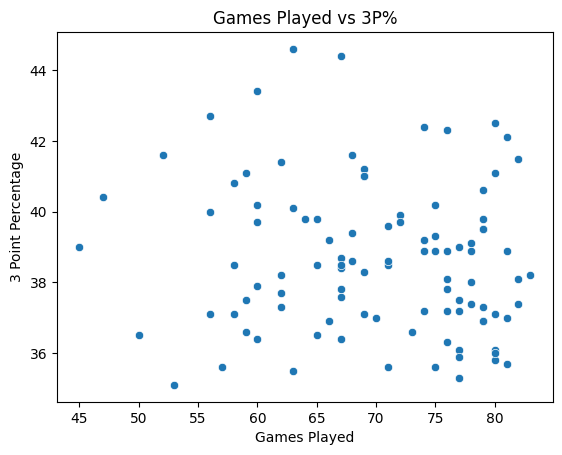

In [29]:
sns.scatterplot(x=df['GP'], y=df['3P%'])
plt.xlabel('Games Played')
plt.ylabel('3 Point Percentage')
plt.title('Games Played vs 3P%')
plt.show()

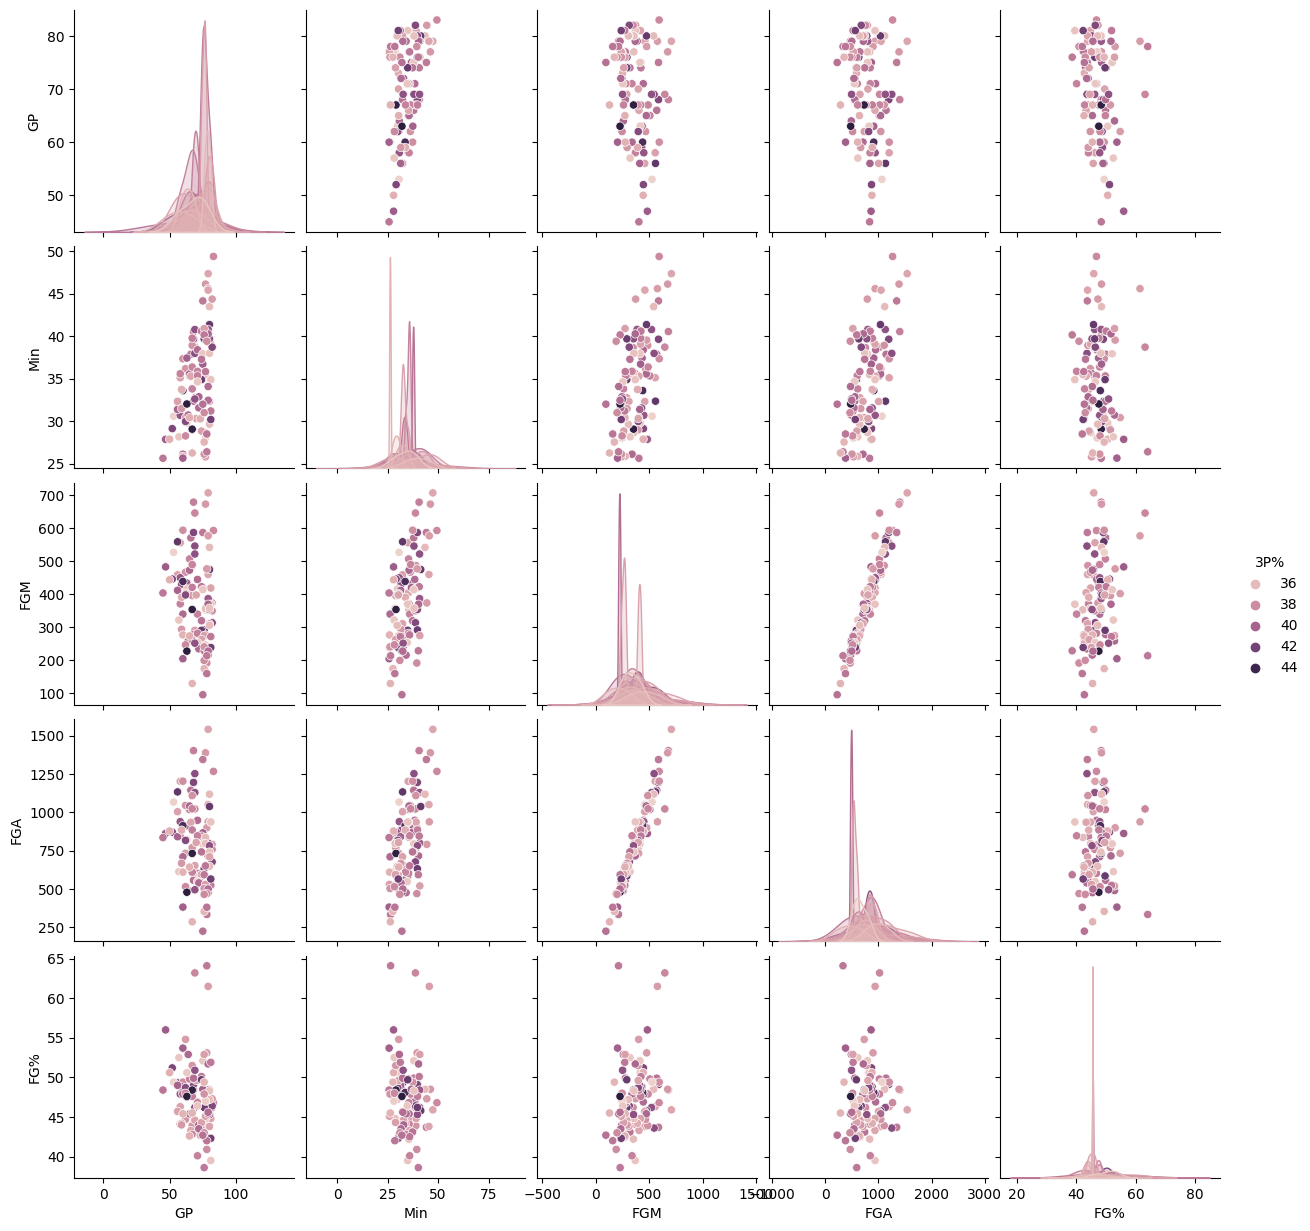

In [30]:
sub_data = data[['GP', 'Min', 'FGM', 'FGA', 'FG%', '3P%']]
sns.pairplot(data=sub_data, hue='3P%')

In [31]:
#Linear Relation Between input and 3P% exits
#input: GP, FGM, FGA, 3PA, 3PM, FG%
#output: 3P%

MODEL BUILDING

In [32]:
data = pd.read_csv('Clean_data.csv')
data.head()

,Unnamed: 0,Player,Team,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
0,5,Anthony Edwards,MIN,21.0,79.0,40.0,39.0,47.358333,1946.0,707.0,1541.0,45.9,213.0,578.0,36.9
1,7,Donovan Mitchell,CLE,26.0,68.0,44.0,24.0,40.540000,1922.0,679.0,1402.0,48.4,245.0,635.0,38.6
2,9,Zach LaVine,CHI,28.0,77.0,38.0,39.0,46.131667,1913.0,673.0,1388.0,48.5,204.0,544.0,37.5
3,10,Damian Lillard,POR,32.0,58.0,27.0,31.0,35.110000,1866.0,556.0,1202.0,46.3,244.0,658.0,37.1
4,15,Lauri Markkanen,UTA,25.0,66.0,32.0,34.0,37.875000,1691.0,571.0,1144.0,49.9,200.0,510.0,39.2


In [33]:
data.drop(['Unnamed: 0', 'Team', 'Age'], axis=1, inplace=True)
data.head()

,Player,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%
0,Anthony Edwards,79.0,40.0,39.0,47.358333,1946.0,707.0,1541.0,45.9,213.0,578.0,36.9
1,Donovan Mitchell,68.0,44.0,24.0,40.540000,1922.0,679.0,1402.0,48.4,245.0,635.0,38.6
2,Zach LaVine,77.0,38.0,39.0,46.131667,1913.0,673.0,1388.0,48.5,204.0,544.0,37.5
3,Damian Lillard,58.0,27.0,31.0,35.110000,1866.0,556.0,1202.0,46.3,244.0,658.0,37.1
4,Lauri Markkanen,66.0,32.0,34.0,37.875000,1691.0,571.0,1144.0,49.9,200.0,510.0,39.2


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
data['Player_encoded'] = le.fit_transform(data['Player'])
data.head()

,Player,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,Player_encoded
0,Anthony Edwards,79.0,40.0,39.0,47.358333,1946.0,707.0,1541.0,45.9,213.0,578.0,36.9,4
1,Donovan Mitchell,68.0,44.0,24.0,40.540000,1922.0,679.0,1402.0,48.4,245.0,635.0,38.6,30
2,Zach LaVine,77.0,38.0,39.0,46.131667,1913.0,673.0,1388.0,48.5,204.0,544.0,37.5,100
3,Damian Lillard,58.0,27.0,31.0,35.110000,1866.0,556.0,1202.0,46.3,244.0,658.0,37.1,23
4,Lauri Markkanen,66.0,32.0,34.0,37.875000,1691.0,571.0,1144.0,49.9,200.0,510.0,39.2,63


In [36]:
X = data.drop(['3P%','Player','W','L','PTS'] ,axis=1)
y = data['3P%']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, r2_score, mean_squared_error

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [40]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7848088510739228
0.7114287698146564


In [41]:
custom_test = lr.predict([[79,47,707,1541,45,213,578,4]])
cs = lr.predict([[66,37,571,1144,49,200,510,63]])

c:\Users\atmik shetty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\atmik shetty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
X.head()

,GP,Min,FGM,FGA,FG%,3PM,3PA,Player_encoded
0,79.0,47.358333,707.0,1541.0,45.9,213.0,578.0,4
1,68.0,40.540000,679.0,1402.0,48.4,245.0,635.0,30
2,77.0,46.131667,673.0,1388.0,48.5,204.0,544.0,100
3,58.0,35.110000,556.0,1202.0,46.3,244.0,658.0,23
4,66.0,37.875000,571.0,1144.0,49.9,200.0,510.0,63


In [43]:
print(custom_test)  # 36.9
print(cs)  # 39.2 

[36.10944129]
[38.82573125]


In [44]:
import pickle
pickle.dump(lr, open('nba_stat.pkl', 'wb'))